In [51]:
import pandas as pd
import plotnine as p9
import numpy as np

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track (are we sure we are getting the right data variables. popularity can be for artist, album, track ....

id: (string) The Spotify ID for the track.

title: 

all_artists: 

popularity: 

release_date:

danceability: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

key: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11

loudness: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

acousticness: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

instrumentalness: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

tempo: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration_ms: (int) The duration of the track in milliseconds.

time_signature: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7


In [2]:
data = pd.read_csv("TikTok_Playlist.csv")

In [38]:
quantitative = ['popularity','danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
facetdf = pd.melt(data, id_vars=['id'], value_vars=quantitative)

In [45]:
facetdf.isna().sum()

id          0
variable    0
value       0
dtype: int64

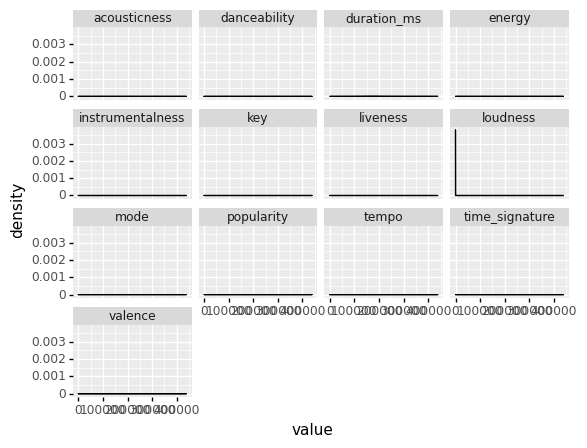

<ggplot: (8795381081441)>

In [53]:
#not working
gg = p9.ggplot(facetdf, p9.aes(x='value'))
gg += p9.geom_density()
gg += p9.facet_wrap('~variable')
gg

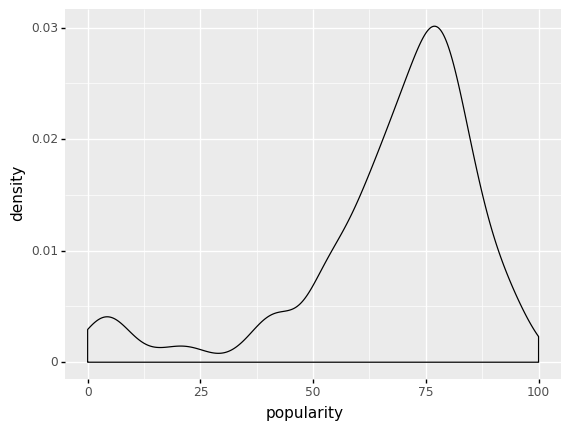

<ggplot: (8795381732605)>

In [14]:
gg = p9.ggplot(data, p9.aes(x='popularity'))
gg += p9.geom_density()
gg

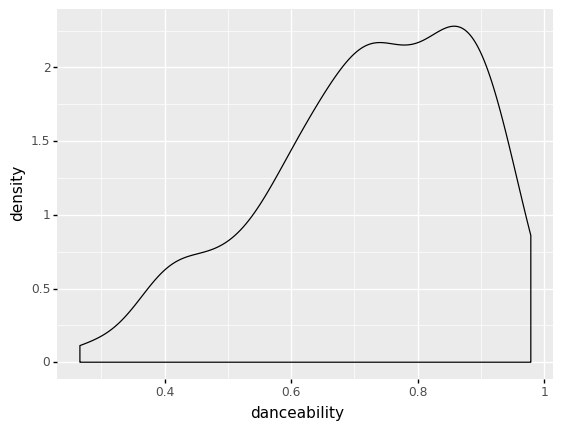

<ggplot: (8795381637295)>

In [9]:
gg = p9.ggplot(data, p9.aes(x='danceability'))
gg += p9.geom_density()
gg

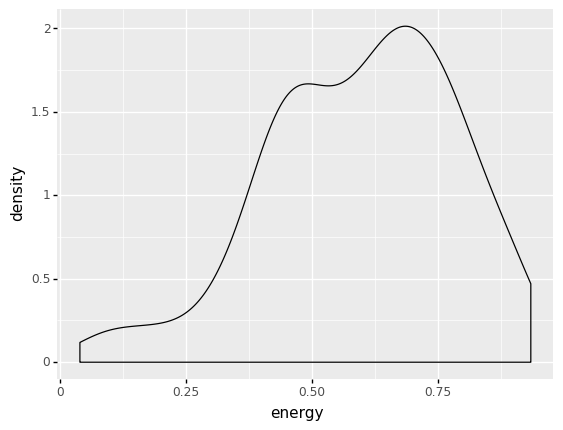

<ggplot: (8795381642207)>

In [11]:
gg = p9.ggplot(data, p9.aes(x='energy'))
gg += p9.geom_density()
gg

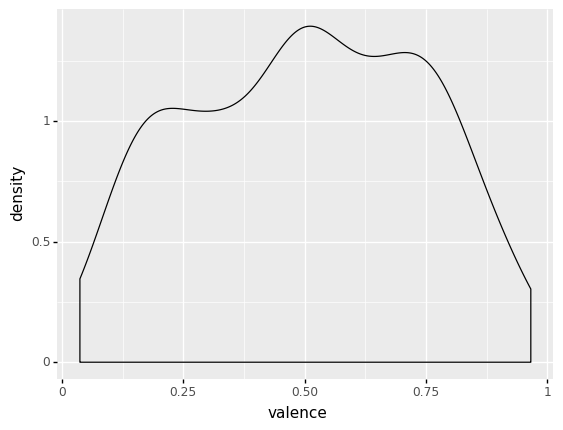

<ggplot: (8795381301152)>

In [12]:
gg = p9.ggplot(data, p9.aes(x='valence'))
gg += p9.geom_density()
gg

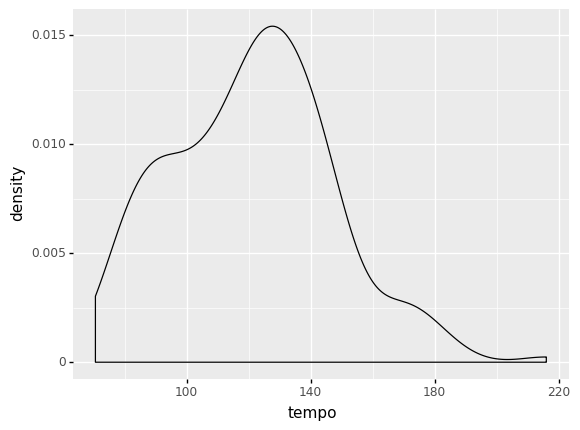

<ggplot: (8795381322674)>

In [13]:
gg = p9.ggplot(data, p9.aes(x='tempo'))
gg += p9.geom_density()
gg

In [ ]:
gg = p9.ggplot(data)
gg += p9.facet_wrap('~system') \
gg += p9.geom_density(mapping=p9.aes(x='voter_density',y='swing'))